In [63]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Sales.csv') #dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
df.shape #rows and coloumns

(400, 5)

In [65]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [66]:
Gender = pd.get_dummies(df, columns=['Gender'])

In [67]:
Gender.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


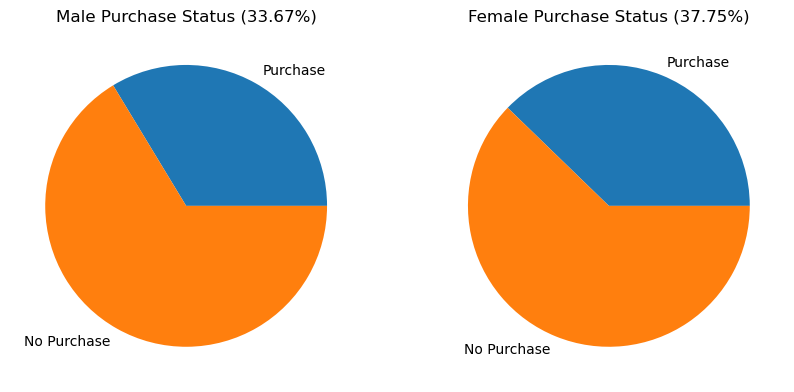

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming your data is stored in a DataFrame called 'df'
gender_dummies = pd.get_dummies(df, columns=['Gender'])

# create separate DataFrames for males and females
male_df = gender_dummies[gender_dummies['Gender_Male'] == 1]
female_df = gender_dummies[gender_dummies['Gender_Female'] == 1]

# count number of males and females who made a purchase
male_purchase = len(male_df[male_df['Purchased'] == 1])
female_purchase = len(female_df[female_df['Purchased'] == 1])

# count number of males and females who did not make a purchase
male_no_purchase = len(male_df[male_df['Purchased'] == 0])
female_no_purchase = len(female_df[female_df['Purchased'] == 0])

# calculate percentage of males and females who made a purchase
male_purchase_pct = round(male_purchase / len(male_df) * 100, 2)
female_purchase_pct = round(female_purchase / len(female_df) * 100, 2)

# create two pie charts, one for males and one for females
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie([male_purchase_pct, 100-male_purchase_pct], labels=['Purchase', 'No Purchase'])
axs[0].set_title(f'Male Purchase Status ({male_purchase_pct}%)')

axs[1].pie([female_purchase_pct, 100-female_purchase_pct], labels=['Purchase', 'No Purchase'])
axs[1].set_title(f'Female Purchase Status ({female_purchase_pct}%)')

plt.show()


In [69]:
X=df.iloc[:,[2,3]] #variable 
Y=df.iloc[:,[4]]   #target 

In [70]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [71]:
X.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


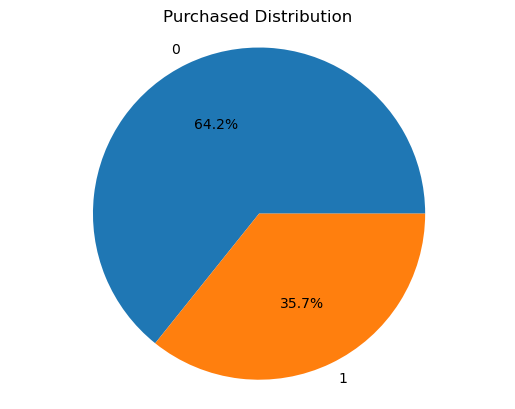

In [72]:
Y.Purchased.value_counts(normalize=True)

import matplotlib.pyplot as plt

counts = Y.Purchased.value_counts(normalize=True)
labels = counts.index
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Purchased Distribution')
plt.show()


In [73]:
# import matplotlib.pyplot as plt

# # Calculate the average value of the 'Purchased' column for each value of 'Age'
# age_groups = df.iloc[:,[2]]
# purchases = Y
# # Create a bar chart with the average purchase rate for each age group
# plt.bar(age_groups, purchases['Purchased'])
# plt.xlabel('Age')
# plt.ylabel('Purchase Rate')
# plt.title('Purchase Rate by Age')
# plt.show()


In [74]:
#split 
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [75]:
print("Training data: ",X_Train.shape)
print("Test data: ",X_Test.shape)

Training data:  (300, 2)
Test data:  (100, 2)


In [76]:
#feature

from sklearn.preprocessing import StandardScaler # to be units and precision
sc_X=StandardScaler()
X_Train=sc_X.fit_transform(X_Train) #transformation,mean and standard deviation from the training data during the fit step.
X_Test=sc_X.transform(X_Test) 

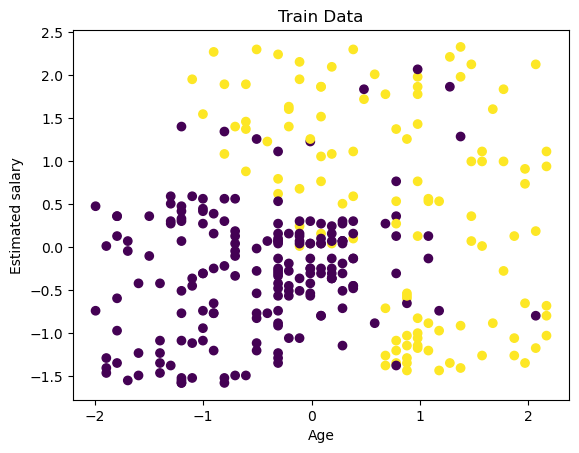

In [77]:
#scatter plot train data , purple 0 yellow 1 
import matplotlib.pyplot as plt

plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train.values.ravel()) 
plt.xlabel('Age')
plt.ylabel('Estimated salary') 
plt.title('Train Data') 
plt.show()

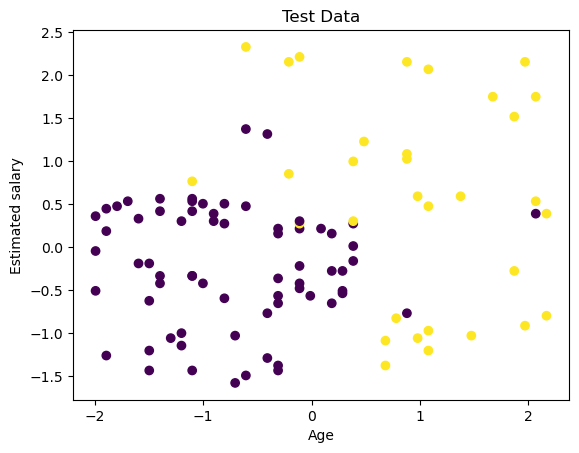

In [78]:
#scatter plot test data
import matplotlib.pyplot as plt

plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test.values.ravel()) 
plt.xlabel('Age')
plt.ylabel('Estimated salary') 
plt.title('Test Data') 
plt.show()

In [79]:
##model
from sklearn.svm import SVC #algo
#a kernel is a function that computes a similarity measure between pairs of data points in a given feature space.
classifier=SVC(kernel='linear',random_state=0)  #hyperplane separates the different classes of data points
classifier.fit(X_Train,Y_Train.values.ravel()) #train

#predicting results
Y_Pred=classifier.predict(X_Test) 



In [80]:
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [81]:
n=Y_Pred.shape[0]
n

100

In [82]:
# #hyperplane
# # plot datapoints  
# plt.scatter(X_Test[:, 0],X_Test[:, 1],c=Y_Test.values.ravel()) 
# #plt.scatter (x Train:, 0), x Train:, 1), Train)


# # Create the hyperplane
# w = classifier.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-2.5, 2.5)
# yy = a * xx - (classifier.intercept_[0]) / w[1]

# # Plot the hyperplane
# plt.plot(xx, yy)
# plt.title('SVM Linear')
# plt.xlabel('Variable X')
# plt.ylabel('Target Y')
# # Show the plot
# plt.show()


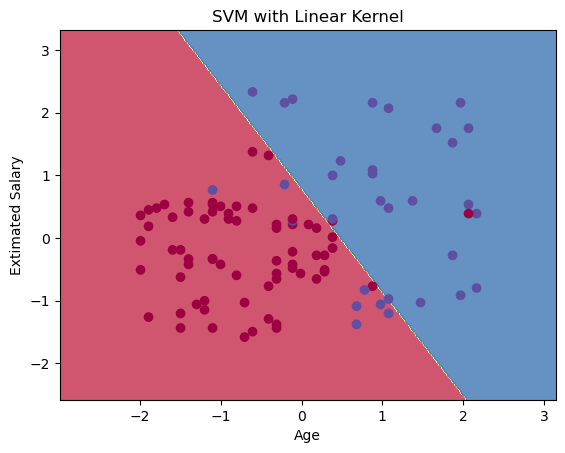

In [83]:
# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Extimated Salary')
plt.title('SVM with Linear Kernel')
plt.show()


#3333333333333333333333333333333333

In [84]:
from sklearn import metrics
print('Accuracy(linear):',metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy(linear): 0.9


In [85]:
#confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test,Y_Pred)

print ('Confusion Matrix(GaussianNB)')
cm


Confusion Matrix(GaussianNB)


array([[66,  2],
       [ 8, 24]], dtype=int64)

In [86]:
TN = cm[0,0]
print("True Negative:",TN)

FP=cm[0,1]
print("False Possitive:",FP)

FN = cm[1,0]
print("False Negative:",FN)

TP = cm[1,1]
print("True Possitive:",TP)

#Again Accuracy
(TN+TP)/n
#TPR(True possitive rate) or Sensitivity
recall_L = TP/(TP+FP)
recall_L


#TNR/Specificity
specificity = TN/(TN+FP)
specificity

#FPR
FPR = 1-specificity
FPR
precision_L = TP/(TP+FP)
precision_L

#F1_score is the hermonic mean between precision and reall
F1_score_L = (2*precision*recall)/(precision+recall)
F1_score_L

# # Define the precision and recall values for each method
from sklearn.metrics import precision_recall_curve
precision_L, recall_L, _ = precision_recall_curve(Y_Test, Y_Pred)



True Negative: 66
False Possitive: 2
False Negative: 8
True Possitive: 24


NameError: name 'precision' is not defined

In [87]:
#or
from sklearn.metrics import f1_score
f1_score(Y_Test,Y_Pred)


0.8275862068965517

In [88]:
## ROC(Receiver operating characteristic) Curve 
#[plot between false positive rate and true positive rate]
from sklearn.metrics import roc_curve
probs = classifier.decision_function(X_Test)
fpr, tpr, threshold = roc_curve(Y_Test, probs)

# Reshape each array individually
threshold_reshaped = threshold.reshape(-1, 1)
fpr_reshaped = fpr.reshape(-1, 1)
tpr_reshaped = tpr.reshape(-1, 1)

# Horizontally stack the reshaped arrays
stacked_data = np.hstack((threshold_reshaped, fpr_reshaped, tpr_reshaped))

# Create a DataFrame with appropriate column names
df = pd.DataFrame(stacked_data, columns=['threshold', 'fpr', 'tpr'])

df.head()


# from sklearn.metrics import roc_curve
# probs = classifier.predict_proba(X_Test)
# probs
# prob_positive = probs[:, 1]
# fpr, tpr, threshold = roc_curve(Y_Test, prob_positive)

# # Reshape each array individually
# threshold_reshaped = threshold.reshape(-1, 1)
# fpr_reshaped = fpr.reshape(-1, 1)
# tpr_reshaped = tpr.reshape(-1, 1)

# # Horizontally stack the reshaped arrays
# stacked_data = np.hstack((threshold_reshaped, fpr_reshaped, tpr_reshaped))

# # Create a DataFrame with appropriate column names
# df = pd.DataFrame(stacked_data, columns=['threshold', 'fpr', 'tpr'])

# df.head()



,threshold,fpr,tpr
0,5.481912,0.000000,0.00000
1,4.481912,0.000000,0.03125
2,2.968760,0.000000,0.21875
3,2.922674,0.014706,0.21875
4,0.139602,0.014706,0.71875


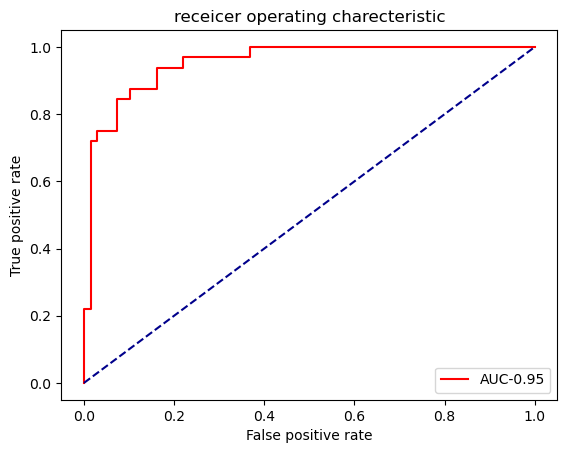

In [89]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc
import matplotlib.pyplot as plt
plt.title("receicer operating charecteristic")
plt.plot(fpr,tpr,'red',label = 'AUC-%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

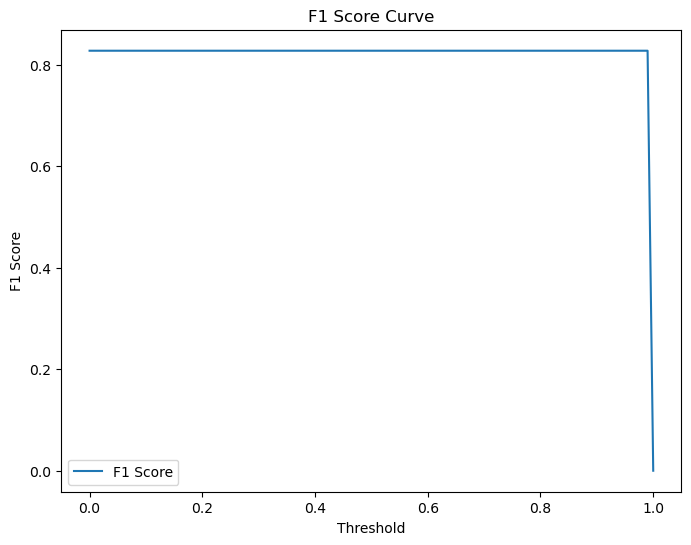

In [90]:
#F1 flot

thresholds = np.arange(0, 1.01, 0.01)  # Generate thresholds from 0 to 1
f1_scores = [f1_score(Y_Test, Y_Pred > threshold) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.show()

In [91]:
#Second

from sklearn.svm import SVC
classifier_Rbf=SVC(kernel='rbf') #radial basis function
classifier_Rbf.fit(X_Train,Y_Train.values.ravel())

#predicting results
Y_Pred=classifier_Rbf.predict(X_Test)

print('Accuracy(rbf):',metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy(rbf): 0.93


In [92]:
# # Create a meshgrid for plotting the decision boundary
# h = 0.02
# x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
# y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Predict class labels for the meshgrid points
# Z = classifier_Rbf.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot data points and decision boundary
# plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
# plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.title('SVM with RBF Kernel')
# plt.show()


In [93]:
#confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test,Y_Pred)

print ('Confusion Matrix(GaussianNB)')
cm

Confusion Matrix(GaussianNB)


array([[64,  4],
       [ 3, 29]], dtype=int64)

In [94]:
TN = cm[0,0]
print("True Negative:",TN)

FP=cm[0,1]
print("False Possitive:",FP)

FN = cm[1,0]
print("False Negative:",FN)

TP = cm[1,1]
print("True Possitive:",TP)

#Again Accuracy
(TN+TP)/n
#TPR(True possitive rate) or Sensitivity
recall_R = TP/(TP+FP)
recall_R

#TNR/Specificity
specificity = TN/(TN+FP)
specificity

#FPR
FPR = 1-specificity
FPR
precision_R = TP/(TP+FP)
precision_R

#F1_score is the hermonic mean between precision and reall
F1_score_R = (2*precision*recall)/(precision+recall)
F1_score_R

from sklearn.metrics import precision_recall_curve
precision_R, recall_R, _ = precision_recall_curve(Y_Test, Y_Pred)
# #or
# from sklearn.metrics import f1_score
# f1_score(Y_Test,Y_Pred)

True Negative: 64
False Possitive: 4
False Negative: 3
True Possitive: 29


NameError: name 'precision' is not defined

In [95]:
## ROC(Receiver operating characteristic) Curve 
#[plot between false positive rate and true positive rate]
from sklearn.metrics import roc_curve
probs = classifier_Rbf.decision_function(X_Test)
fpr, tpr, threshold = roc_curve(Y_Test, probs)

# Reshape each array individually
threshold_reshaped = threshold.reshape(-1, 1)
fpr_reshaped = fpr.reshape(-1, 1)
tpr_reshaped = tpr.reshape(-1, 1)

# Horizontally stack the reshaped arrays
stacked_data = np.hstack((threshold_reshaped, fpr_reshaped, tpr_reshaped))

# Create a DataFrame with appropriate column names
df = pd.DataFrame(stacked_data, columns=['threshold', 'fpr', 'tpr'])

df.head()

,threshold,fpr,tpr
0,2.451757,0.000000,0.00000
1,1.451757,0.000000,0.03125
2,1.129976,0.000000,0.31250
3,1.129716,0.014706,0.31250
4,1.084719,0.014706,0.46875


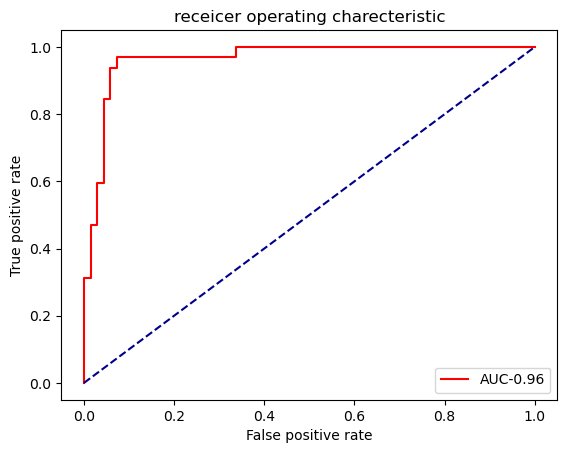

In [96]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc
import matplotlib.pyplot as plt
plt.title("receicer operating charecteristic")
plt.plot(fpr,tpr,'red',label = 'AUC-%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

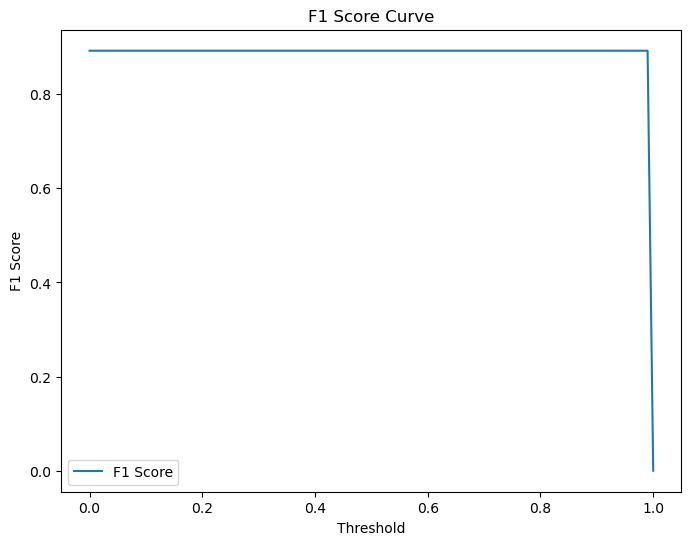

In [97]:
#F1 flot

thresholds = np.arange(0, 1.01, 0.01)  # Generate thresholds from 0 to 1
f1_scores = [f1_score(Y_Test, Y_Pred > threshold) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.show()


In [98]:
#third
sv=SVC(kernel='poly',degree=4)
sv.fit(X_Train,Y_Train.values.ravel())

#predicting results
Y_Pred=sv.predict(X_Test)

print('Accuracy(poly):',metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy(poly): 0.79


In [99]:
# # Create a meshgrid for plotting the decision boundary
# h = 0.02
# x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
# y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Predict class labels for the meshgrid points
# Z = sv.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot data points and decision boundary
# plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
# plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.title('SVM with Ploy Kernel')
# plt.show()


In [100]:
# # Plot data points
# plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel())

# # Create the hyperplane
# w = classifier.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-2.5, 2.5)
# yy = a * xx - (classifier.intercept_[0]) / w[1]

# # Plot the hyperplane
# plt.plot(xx, yy)

# # Add labels and title
# plt.xlabel('Variable X')
# # plt.ylabel('')
# plt.title('SVM with Polynomial Kernel (Degree 4)')

# # Show the plot
# plt.show()


In [101]:
#confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test,Y_Pred)

print ('Confusion Matrix(Ploynomial)')
cm

Confusion Matrix(Ploynomial)


array([[66,  2],
       [19, 13]], dtype=int64)

In [102]:
TN = cm[0,0]
print("True Negative:",TN)

FP=cm[0,1]
print("False Possitive:",FP)

FN = cm[1,0]
print("False Negative:",FN)

TP = cm[1,1]
print("True Possitive:",TP)

#Again Accuracy
(TN+TP)/n
#TPR(True possitive rate) or Sensitivity
recall = TP/(TP+FP)
recall

#TNR/Specificity
specificity = TN/(TN+FP)
specificity

#FPR
FPR = 1-specificity
FPR
precision = TP/(TP+FP)
precision

#F1_score is the hermonic mean between precision and reall
F1_score = (2*precision*recall)/(precision+recall)
F1_score

from sklearn.metrics import precision_recall_curve
precision_P, recall_P, _= precision_recall_curve(Y_Test, Y_Pred)

True Negative: 66
False Possitive: 2
False Negative: 19
True Possitive: 13


In [103]:
#or
from sklearn.metrics import f1_score
f1_score(Y_Test,Y_Pred)

0.5531914893617021

In [104]:
## ROC(Receiver operating characteristic) Curve 
#[plot between false positive rate and true positive rate]
from sklearn.metrics import roc_curve
probs = sv.decision_function(X_Test)
fpr, tpr, threshold = roc_curve(Y_Test, probs)

# Reshape each array individually
threshold_reshaped = threshold.reshape(-1, 1)
fpr_reshaped = fpr.reshape(-1, 1)
tpr_reshaped = tpr.reshape(-1, 1)

# Horizontally stack the reshaped arrays
stacked_data = np.hstack((threshold_reshaped, fpr_reshaped, tpr_reshaped))

# Create a DataFrame with appropriate column names
df = pd.DataFrame(stacked_data, columns=['threshold', 'fpr', 'tpr'])

df.head()

,threshold,fpr,tpr
0,17.969732,0.000000,0.00000
1,16.969732,0.000000,0.03125
2,1.912818,0.000000,0.15625
3,1.682090,0.014706,0.15625
4,0.950023,0.014706,0.31250


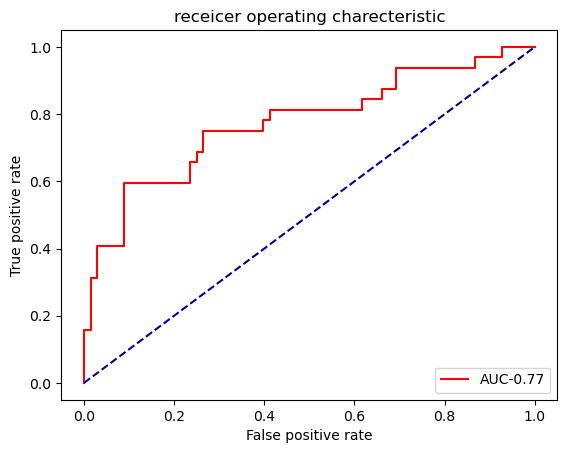

In [105]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc
import matplotlib.pyplot as plt
plt.title("receicer operating charecteristic")
plt.plot(fpr,tpr,'red',label = 'AUC-%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

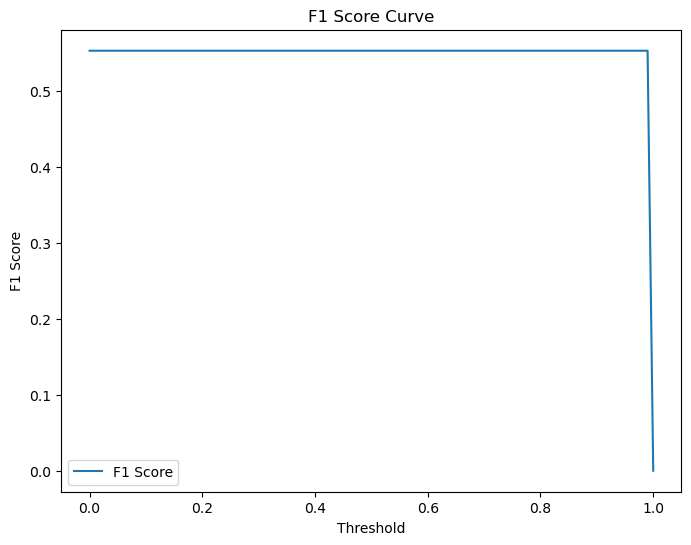

In [106]:
#F1 flot

thresholds = np.arange(0, 1.01, 0.01)  # Generate thresholds from 0 to 1
f1_scores = [f1_score(Y_Test, Y_Pred > threshold) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.show()

In [107]:
#fourth

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_Train, Y_Train.values.ravel())

Y_pred = nb.predict(X_Test)

print('Accuracy(GaussianNB):', metrics.accuracy_score(Y_Test, Y_Pred))



Accuracy(GaussianNB): 0.79


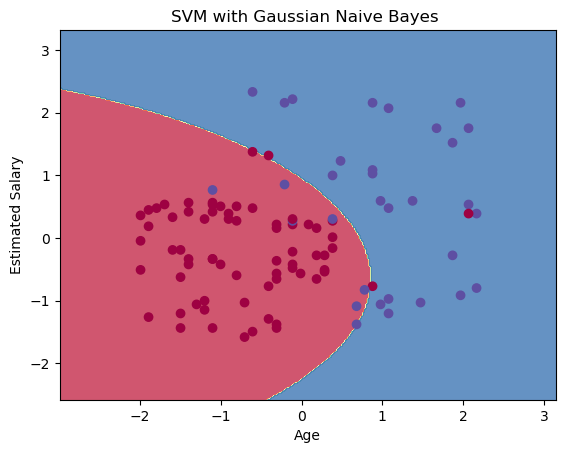

In [108]:
# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the meshgrid points
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM with Gaussian Naive Bayes ')
plt.show()


In [109]:
#seond part 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test,Y_Pred)

print ('Confusion Matrix(GaussianNB)')
cm

Confusion Matrix(GaussianNB)


array([[66,  2],
       [19, 13]], dtype=int64)

In [110]:
TN = cm[0,0]
print("True Negative:",TN)

True Negative: 66


In [111]:
FP=cm[0,1]
print("False Possitive:",FP)

False Possitive: 2


In [112]:
FN = cm[1,0]
print("False Negative:",FN)

False Negative: 19


In [113]:
TP = cm[1,1]
print("True Possitive:",TP)

True Possitive: 13


In [114]:
#Again Accuracy
(TN+TP)/n
#TPR(True possitive rate) or Sensitivity
recall_G = TP/(TP+FP)
recall_G



0.8666666666666667

In [115]:
#TNR/Specificity
specificity = TN/(TN+FP)
specificity

0.9705882352941176

In [116]:
#FPR
FPR = 1-specificity
FPR
precision_G = TP/(TP+FP)
precision_G


0.8666666666666667

In [117]:
from sklearn.metrics import precision_recall_curve
precision_G,recall_G,_= precision_recall_curve(Y_Test, Y_Pred)

In [118]:
#F1_score is the hermonic mean between precision and reall
F1_score = (2*precision*recall)/(precision+recall)
F1_score

0.8666666666666667

In [119]:
#or
from sklearn.metrics import f1_score
f1_score(Y_Test,Y_Pred)

0.5531914893617021

In [120]:
## ROC(Receiver operating characteristic) Curve 
#[plot between false positive rate and true positive rate]
from sklearn.metrics import roc_curve
probs = nb.predict_proba(X_Test)
probs
prob_positive = probs[:, 1]
fpr, tpr, threshold = roc_curve(Y_Test, prob_positive)



In [121]:
# Reshape each array individually
threshold_reshaped = threshold.reshape(-1, 1)
fpr_reshaped = fpr.reshape(-1, 1)
tpr_reshaped = tpr.reshape(-1, 1)


In [122]:
# Horizontally stack the reshaped arrays
stacked_data = np.hstack((threshold_reshaped, fpr_reshaped, tpr_reshaped))

# Create a DataFrame with appropriate column names
df = pd.DataFrame(stacked_data, columns=['threshold', 'fpr', 'tpr'])

df.head()


,threshold,fpr,tpr
0,1.999508,0.000000,0.00000
1,0.999508,0.000000,0.03125
2,0.969715,0.000000,0.28125
3,0.968220,0.014706,0.28125
4,0.589219,0.014706,0.78125


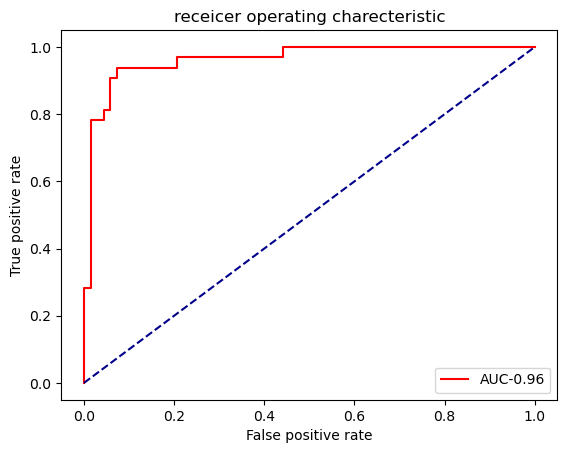

In [123]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc
import matplotlib.pyplot as plt
plt.title("receicer operating charecteristic")
plt.plot(fpr,tpr,'red',label = 'AUC-%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

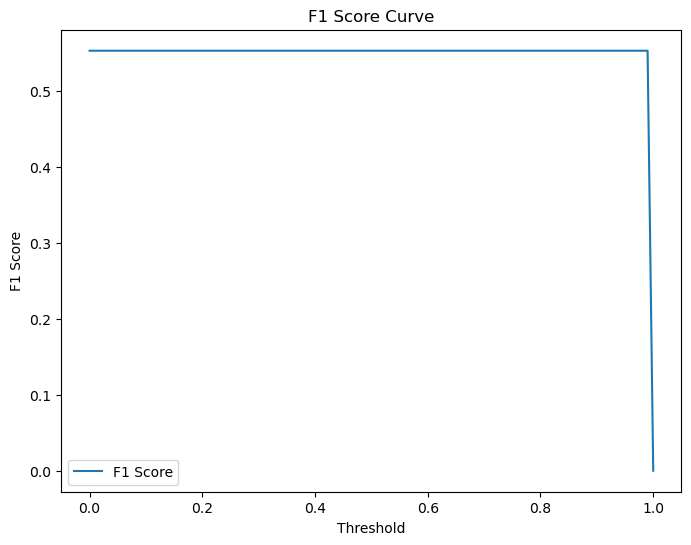

In [124]:
#F1 flot

thresholds = np.arange(0, 1.01, 0.01)  # Generate thresholds from 0 to 1
f1_scores = [f1_score(Y_Test, Y_Pred > threshold) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower left')
plt.show()

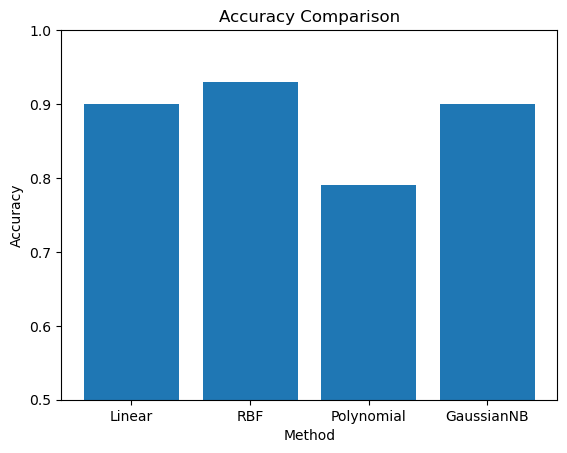

In [125]:
import matplotlib.pyplot as plt

# Train and evaluate the SVM model with linear kernel
classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_Train, Y_Train.values.ravel())
Y_Pred_linear = classifier_linear.predict(X_Test)
accuracy_linear = metrics.accuracy_score(Y_Test, Y_Pred_linear)

# Train and evaluate the SVM model with RBF kernel
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(X_Train, Y_Train.values.ravel())
Y_Pred_rbf = classifier_rbf.predict(X_Test)
accuracy_rbf = metrics.accuracy_score(Y_Test, Y_Pred_rbf)

# Train and evaluate the SVM model with polynomial kernel
classifier_poly = SVC(kernel='poly', degree=4)
classifier_poly.fit(X_Train, Y_Train.values.ravel())
Y_Pred_poly = classifier_poly.predict(X_Test)
accuracy_poly = metrics.accuracy_score(Y_Test, Y_Pred_poly)

# Train and evaluate the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_Train, Y_Train.values.ravel())
Y_Pred_nb = nb.predict(X_Test)
accuracy_nb = metrics.accuracy_score(Y_Test, Y_Pred_nb)

# Plot the accuracies as a bar chart
methods = ['Linear', 'RBF', 'Polynomial', 'GaussianNB']
accuracies = [accuracy_linear, accuracy_rbf, accuracy_poly, accuracy_nb]
plt.bar(methods, accuracies)
plt.ylim(0.5, 1.0)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


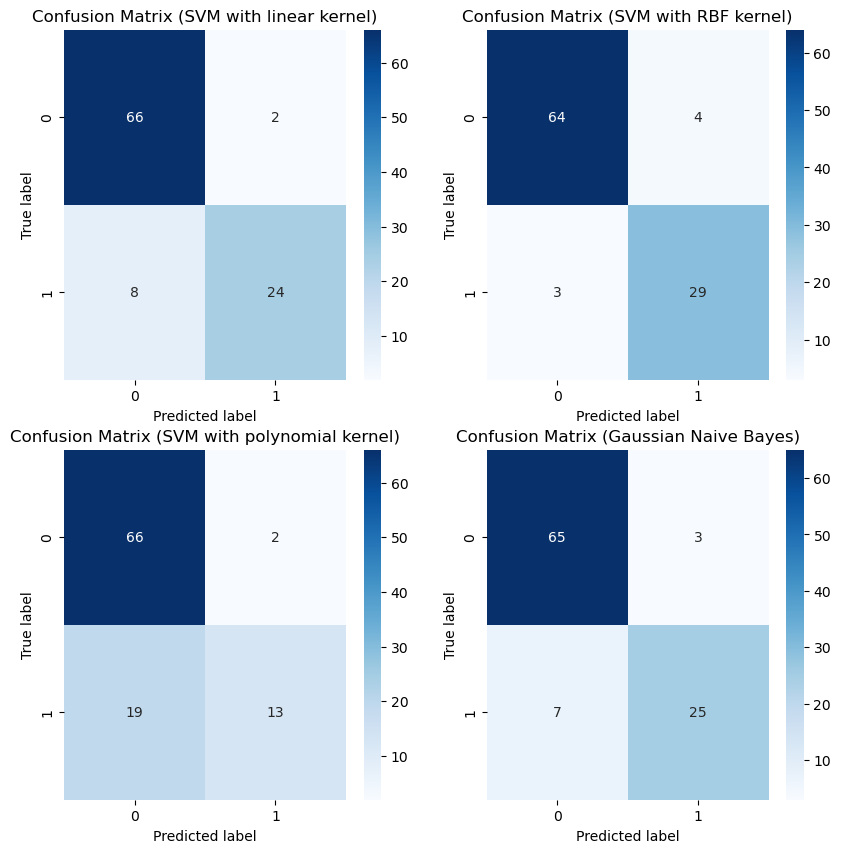

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train and predict using the SVM model with linear kernel
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train.values.ravel())
Y_Pred_linear = classifier.predict(X_Test)

# Train and predict using the SVM model with RBF kernel
classifier_Rbf = SVC(kernel='rbf')
classifier_Rbf.fit(X_Train, Y_Train.values.ravel())
Y_Pred_rbf = classifier_Rbf.predict(X_Test)

# Train and predict using the SVM model with polynomial kernel
sv = SVC(kernel='poly', degree=4)
sv.fit(X_Train, Y_Train.values.ravel())
Y_Pred_poly = sv.predict(X_Test)

# Train and predict using the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_Train, Y_Train.values.ravel())
Y_Pred_nb = nb.predict(X_Test)

# Calculate confusion matrices for all models
cm_linear = confusion_matrix(Y_Test, Y_Pred_linear)
cm_rbf = confusion_matrix(Y_Test, Y_Pred_rbf)
cm_poly = confusion_matrix(Y_Test, Y_Pred_poly)
cm_nb = confusion_matrix(Y_Test, Y_Pred_nb)

# Plot confusion matrices as heatmaps
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='g', ax=axs[0][0])
sns.heatmap(cm_rbf, annot=True, cmap='Blues', fmt='g', ax=axs[0][1])
sns.heatmap(cm_poly, annot=True, cmap='Blues', fmt='g', ax=axs[1][0])
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', ax=axs[1][1])

# Add labels and titles to the plots
axs[0][0].set_xlabel('Predicted label')
axs[0][0].set_ylabel('True label')
axs[0][0].set_title('Confusion Matrix (SVM with linear kernel)')

axs[0][1].set_xlabel('Predicted label')
axs[0][1].set_ylabel('True label')
axs[0][1].set_title('Confusion Matrix (SVM with RBF kernel)')

axs[1][0].set_xlabel('Predicted label')
axs[1][0].set_ylabel('True label')
axs[1][0].set_title('Confusion Matrix (SVM with polynomial kernel)')

axs[1][1].set_xlabel('Predicted label')
axs[1][1].set_ylabel('True label')
axs[1][1].set_title('Confusion Matrix (Gaussian Naive Bayes)')

# Show the plots
plt.show()


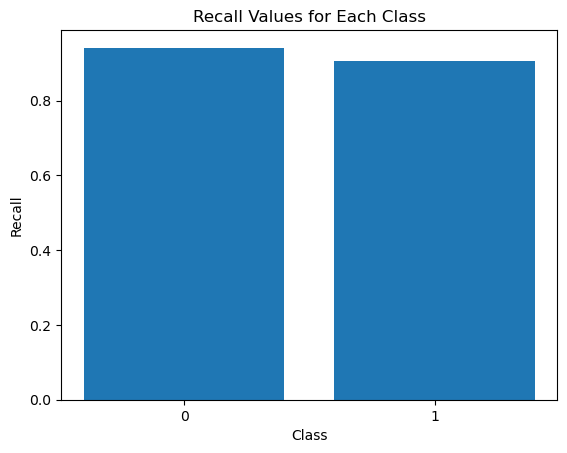

In [127]:
from sklearn.metrics import classification_report

# Train and test the SVM model with RBF kernel
classifier_Rbf = SVC(kernel='rbf')
classifier_Rbf.fit(X_Train, Y_Train.values.ravel())
Y_Pred = classifier_Rbf.predict(X_Test)

# Generate a classification report
report = classification_report(Y_Test, Y_Pred, output_dict=True)

# Extract the recall values for each class
class_names = list(report.keys())[:-3]
recalls = [report[class_name]['recall'] for class_name in class_names]

# Plot the recall values as a bar chart
plt.bar(class_names, recalls)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall Values for Each Class')
plt.show()

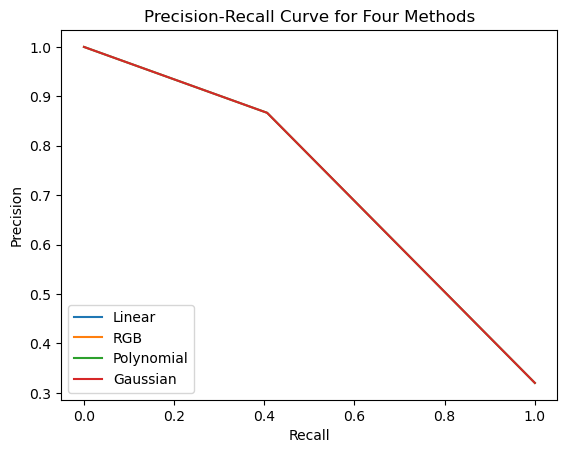

In [128]:
import matplotlib.pyplot as plt




# Define the x-axis labels
labels = ['Linear', 'RGB', 'Polynomial', 'Gaussian']

# Plot the precision-recall curve for each method
plt.plot(recall_L, precision_L, label='Linear')
plt.plot(recall_R, precision_R, label='RGB')

plt.plot(recall_P, precision_P, label='Polynomial')
plt.plot(recall_G, precision_G, label='Gaussian')


# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Four Methods')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()